# Make a collase of the lens model figures
**Author(s):** Muhammad Jobair Hasan, Sulyman Hossain, Anowar J. Shajib

## Import the necessary libraries

In [1]:
import coloripy as cp
import joblib
import lenstronomy
import matplotlib as mpl
import matplotlib.pyplot as plt
import paperfig as pf
import seaborn as sns
from lenstronomy.Plots.model_plot import ModelPlot

In [2]:
lenstronomy.__version__

'1.11.2'

## Plot settings

In [3]:
save_figure = True

In [4]:
pf.set_fontscale(2.0)

# for MNRAS
mpl.rcParams["ps.fonttype"] = 42

# to change tex to Times New Roman in mpl
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"


sns.set(style="ticks", context="paper", font="Times New Roman", font_scale=2.0)
# sns.set_context('talk')
sns.set_style(
    {
        "xtick.direction": "in",
        "ytick.direction": "in",
        "axes.linewidth": 2.0,
    }
)
# sns.set_palette('Set2')

cmap = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.6,
    dark=0.8,
    reverse=False,
    as_cmap=True,
)
cmap2 = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.2,
    dark=1.0,
    reverse=False,
    as_cmap=True,
)

msh_cmap = cp.get_msh_cmap(num_bins=501, rescale="power", power=2.5)

# Plot

In [5]:
lens_names = [
    "DESIJ0132-1600",
    "DESIJ0136-0008",
    "DESIJ0201-2739",
    "DESIJ0215-2909",
    "DESIJ0618+5018",
    "DESIJ0923+1829",
    "DESIJ1018-0121",
    "DESIJ1101-0602",
    "DESIJ1205+4110",
    "DESIJ1501+5208",
    "DESIJ1537+1443",
    "DESIJ1554+0443",
    "DESIJ1624+0129",
    "DESIJ1709+3154",
    "DESIJ2158+0257",
]

-0.8682277399345384 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8682277399345386


/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


-0.937928324645222 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9379283246452212


/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/rafee_adnan/envs/bdlensing/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


-0.9813772975311169 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9813772975299869
-0.9638505655567583 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9638505656778731
-0.8457966839900788 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8457966839900775


/var/folders/9n/3ndvcp611qzclyd98l4cx0mm0000gn/T/ipykernel_6658/1625974381.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


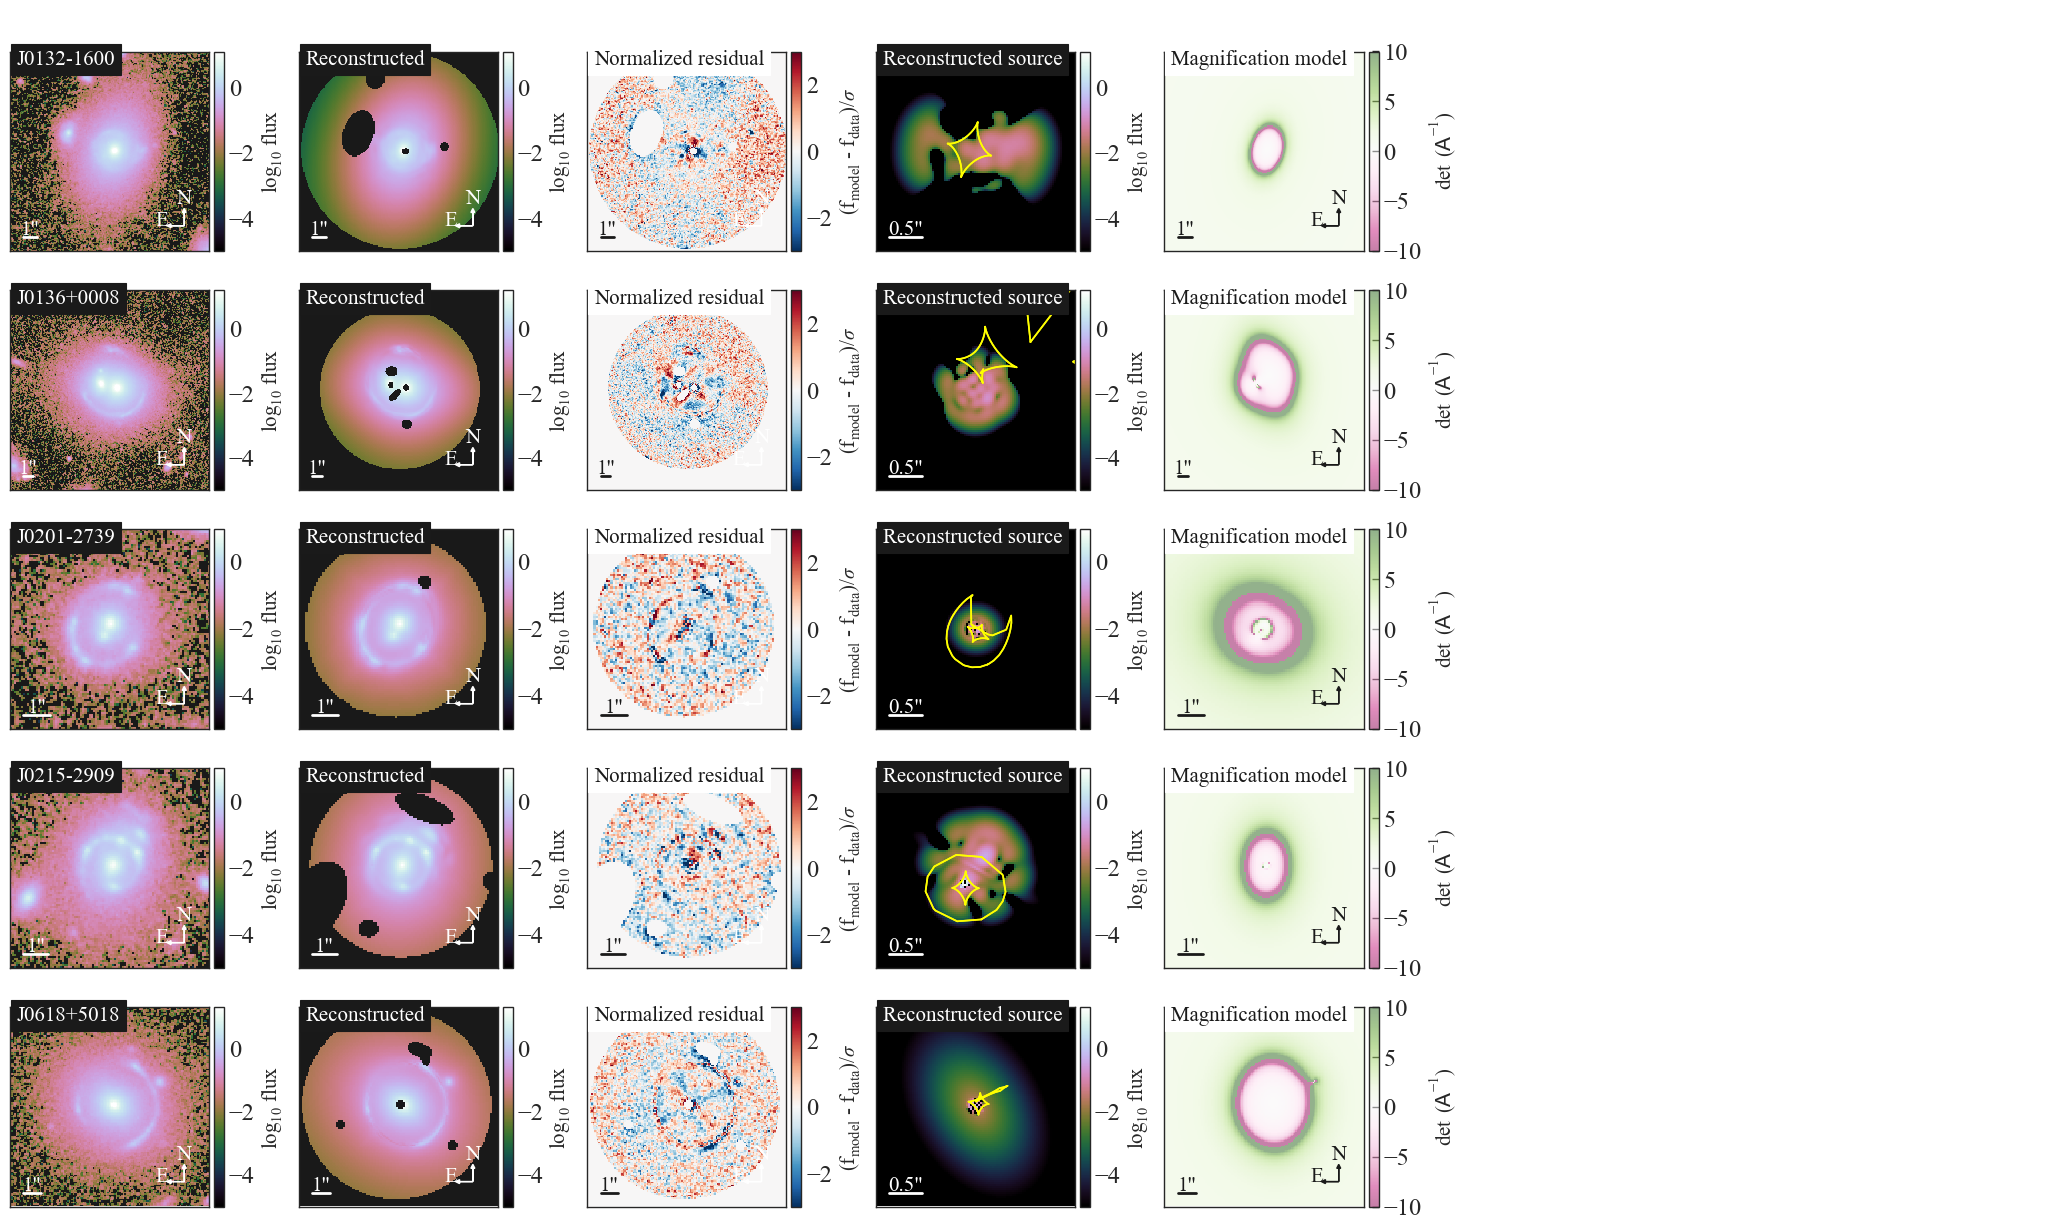

In [6]:
def custom_log_likelihood_addition(**kwargs):
    pass


nrows = 5
ncols = 5
num_lens = nrows

fig, axes = plt.subplots(
    nrows=num_lens,
    ncols=5,
    figsize=(6 * 3, num_lens * 3),
    # sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

for i in range(num_lens):
    lens_name = lens_names[i]

    output_path = f"../lens_systems/{lens_name}/{lens_name}_mcmc_output.joblib"

    try:
        with open(output_path, "rb") as f:
            [input, output] = joblib.load(f)

            [
                kwargs_result_mcmc,
                multi_band_list_out,
                kwargs_fixed_out,
                shortened_samples_mcmc,
                param_mcmc,
            ] = output

            [
                fitting_kwargs_list_mcmc,
                multi_band_list,
                kwargs_model,
                kwargs_constraints,
                kwargs_likelihood,
                kwargs_params,
                init_samples,
            ] = input

    except AttributeError:
        print(f"Failed to load {lens_name}")
        continue

        # print(kwargs_likelihood)
    if "kwargs_tracer_source" in kwargs_result_mcmc:
        del kwargs_result_mcmc["kwargs_tracer_source"]

    model_plot = ModelPlot(
        multi_band_list,
        kwargs_model,
        kwargs_result_mcmc,
        arrow_size=0.02,
        cmap_string="cubehelix",
        image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
        linear_solver=kwargs_constraints.get("linear_solver", True),
    )
    # Print DESIJ0136+0008 instead of DESIJ0136-0008
    if lens_name == "DESIJ0136-0008":
        lens_name = "DESIJ0136+0008"
    model_plot.data_plot(ax=axes[i, 0], text=lens_name[4:14], vmin=-6, vmax=1.5)
    model_plot.model_plot(ax=axes[i, 1], vmin=-6, vmax=1.5)
    model_plot.normalized_residual_plot(
        ax=axes[i, 2], v_min=-3, v_max=3, cmap="RdBu_r", text="Normalized residual"
    )
    model_plot.source_plot(
        ax=axes[i, 3],
        deltaPix_source=0.03,
        numPix=100,
        with_caustics=True,
        scale_size=0.5,
    )
    # model_plot.convergence_plot(ax=axes[i, 3], v_max=1, cmap="gist_heat")
    model_plot.magnification_plot(ax=axes[i, 4], cmap="PiYG")

fig.tight_layout()

# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

fig.savefig(
    "../paper/figures/lens_models_0.pdf",
    bbox_inches="tight",
    # pad_inches=0
)

-1.2350863750314192 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2350863750314283


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.9479867826644764 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9479867826644807


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.6943864653445286 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.6943864653445655


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-1.0641606617613553 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0641606617613486


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: invalid value encountered in log10
  np.log10(self._model),


-0.8251190322490107 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8251190322492101


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/tmp/ipykernel_40481/2136340635.py:72: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


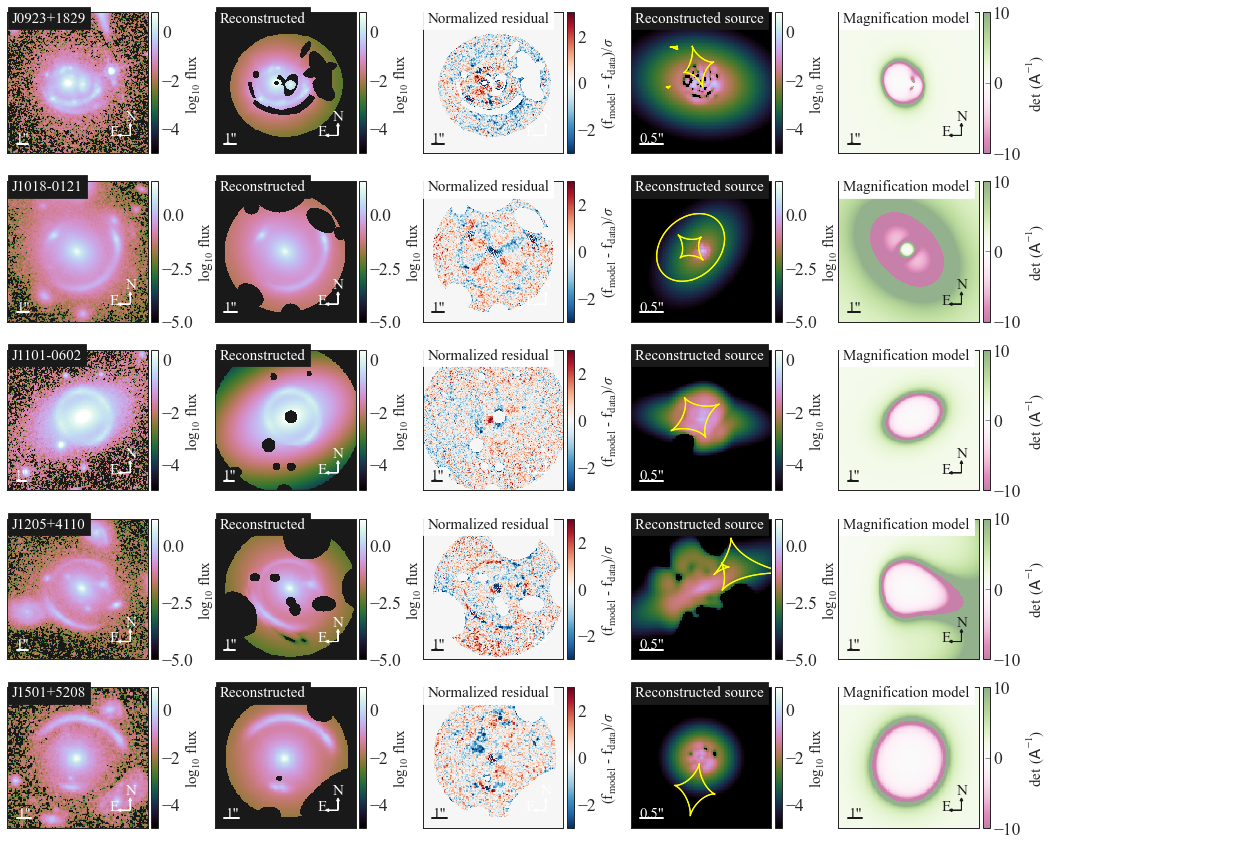

In [15]:
nrows = 5
ncols = 5
num_lens = nrows

fig, axes = plt.subplots(
    nrows=num_lens,
    ncols=5,
    figsize=(6 * 3, num_lens * 3),
    # sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

for i in range(num_lens):
    lens_name = lens_names[i + 5]

    output_path = f"../lens_systems/{lens_name}/{lens_name}_mcmc_output.joblib"

    try:
        with open(output_path, "rb") as f:
            [input, output] = joblib.load(f)

            [
                kwargs_result_mcmc,
                multi_band_list_out,
                kwargs_fixed_out,
                shortened_samples_mcmc,
                param_mcmc,
            ] = output

            [
                fitting_kwargs_list_mcmc,
                multi_band_list,
                kwargs_model,
                kwargs_constraints,
                kwargs_likelihood,
                kwargs_params,
                init_samples,
            ] = input

    except AttributeError:
        print(f"Failed to load {lens_name}")
        continue

        # print(kwargs_likelihood)

    model_plot = ModelPlot(
        multi_band_list,
        kwargs_model,
        kwargs_result_mcmc,
        arrow_size=0.02,
        cmap_string="cubehelix",
        image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
        linear_solver=kwargs_constraints.get("linear_solver", True),
    )

    model_plot.data_plot(ax=axes[i, 0], text=lens_name[4:14], vmin=-6, vmax=1.5)
    model_plot.model_plot(ax=axes[i, 1], vmin=-6, vmax=1.5)
    model_plot.normalized_residual_plot(
        ax=axes[i, 2], v_min=-3, v_max=3, cmap="RdBu_r", text="Normalized residual"
    )
    model_plot.source_plot(
        ax=axes[i, 3],
        deltaPix_source=0.03,
        numPix=100,
        with_caustics=True,
        scale_size=0.5,
    )
    # model_plot.convergence_plot(ax=axes[i, 3], v_max=1, cmap="gist_heat")
    model_plot.magnification_plot(ax=axes[i, 4], cmap="PiYG")

fig.tight_layout()

# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

fig.savefig(
    "../paper/figures/lens_models_1.pdf",
    bbox_inches="tight",
    # pad_inches=0
)

-0.887497411594471 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8874974115944725


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.9468393296547538 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9468393296547567


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.8238441104994287 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.8238441104994422


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.943761372830907 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9437613728309067


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


-0.9798794965935255 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9798794965935254


/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/home/robin/.local/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/tmp/ipykernel_40481/4018678520.py:72: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


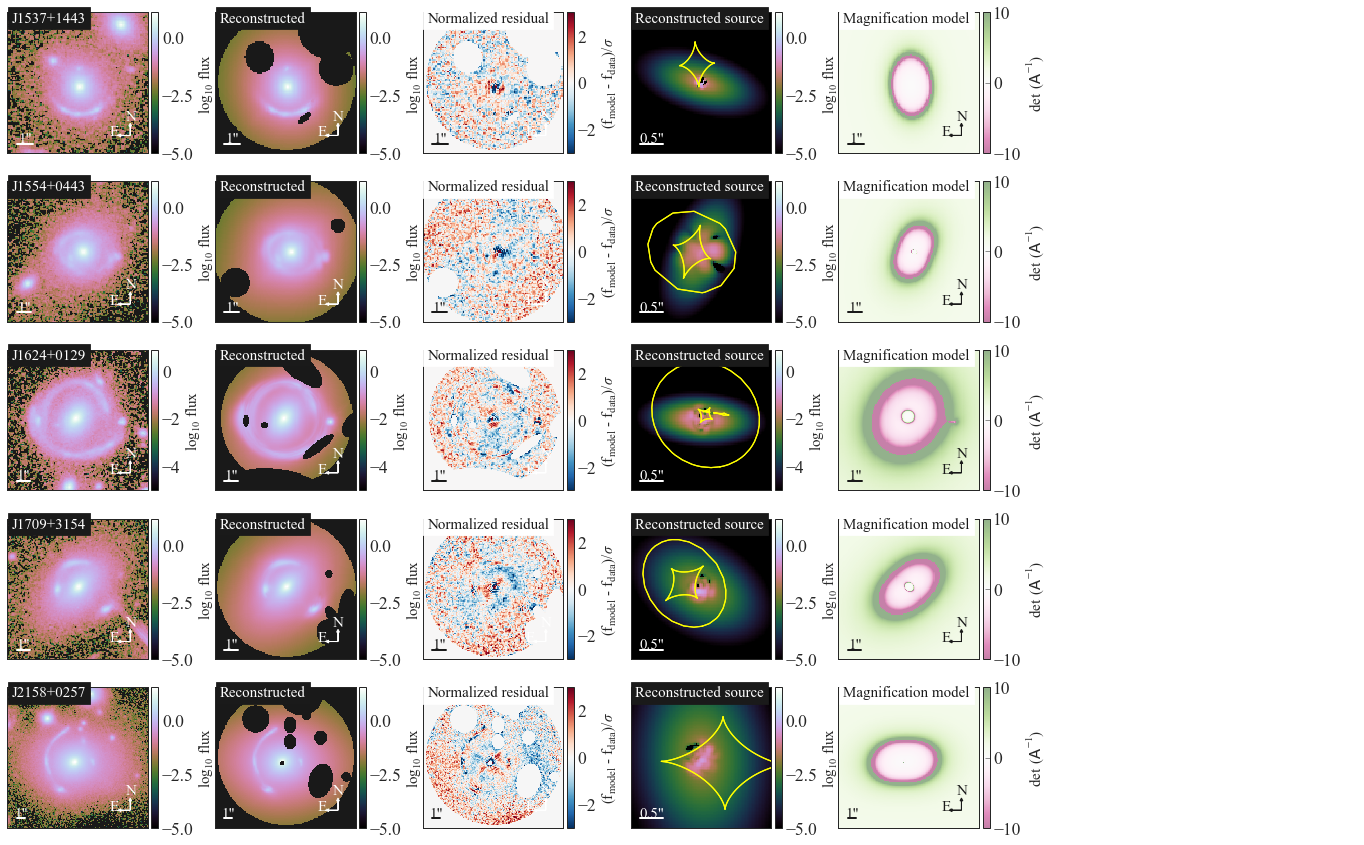

In [16]:
nrows = 5
ncols = 5
num_lens = nrows

fig, axes = plt.subplots(
    nrows=num_lens,
    ncols=5,
    figsize=(6 * 3, num_lens * 3),
    # sharex=True,
    # sharey=True,
    # gridspec_kw={"wspace": 0.05, "hspace": 0.05},
)

for i in range(num_lens):
    lens_name = lens_names[i + 10]

    output_path = f"../lens_systems/{lens_name}/{lens_name}_mcmc_output.joblib"

    try:
        with open(output_path, "rb") as f:
            [input, output] = joblib.load(f)

            [
                kwargs_result_mcmc,
                multi_band_list_out,
                kwargs_fixed_out,
                shortened_samples_mcmc,
                param_mcmc,
            ] = output

            [
                fitting_kwargs_list_mcmc,
                multi_band_list,
                kwargs_model,
                kwargs_constraints,
                kwargs_likelihood,
                kwargs_params,
                init_samples,
            ] = input

    except AttributeError:
        print(f"Failed to load {lens_name}")
        continue

        # print(kwargs_likelihood)

    model_plot = ModelPlot(
        multi_band_list,
        kwargs_model,
        kwargs_result_mcmc,
        arrow_size=0.02,
        cmap_string="cubehelix",
        image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
        linear_solver=kwargs_constraints.get("linear_solver", True),
    )

    model_plot.data_plot(ax=axes[i, 0], text=lens_name[4:14], vmin=-6, vmax=1.5)
    model_plot.model_plot(ax=axes[i, 1], vmin=-6, vmax=1.5)
    model_plot.normalized_residual_plot(
        ax=axes[i, 2], v_min=-3, v_max=3, cmap="RdBu_r", text="Normalized residual"
    )
    model_plot.source_plot(
        ax=axes[i, 3],
        deltaPix_source=0.03,
        numPix=100,
        with_caustics=True,
        scale_size=0.5,
    )
    # model_plot.convergence_plot(ax=axes[i, 3], v_max=1, cmap="gist_heat")
    model_plot.magnification_plot(ax=axes[i, 4], cmap="PiYG")

fig.tight_layout()

# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

fig.savefig(
    "../paper/figures/lens_models_2.pdf",
    bbox_inches="tight",
    # pad_inches=0
)